# Figure 1 

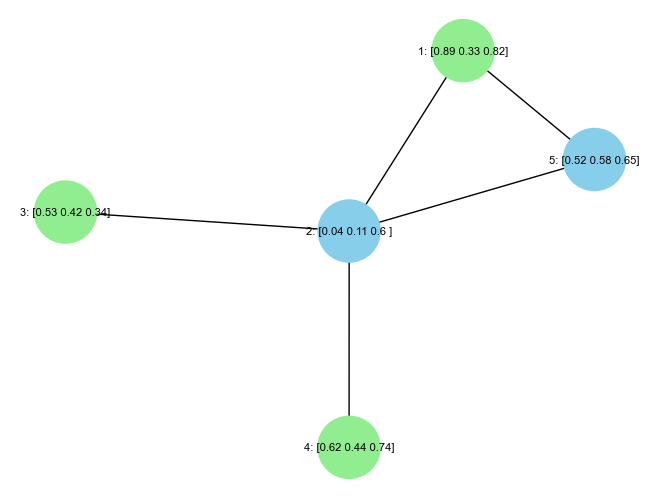

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(6)
G = nx.erdos_renyi_graph(n=5, p=0.5, seed=12)

for node in G.nodes():
    G.nodes[node]['attr'] = np.round(np.random.rand(3),2) # Vector of 3 random attributes


labels = {node: f"{node+1}: {G.nodes[node]['attr']}" for node in G.nodes()}
colors = np.random.choice(['skyblue', 'lightgreen'], size=5)

pos = nx.spring_layout(G, seed=12)
nx.draw(G, pos, with_labels=False, node_color=colors, node_size=2000, font_size=10)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)
plt.show()


# Figure 2 

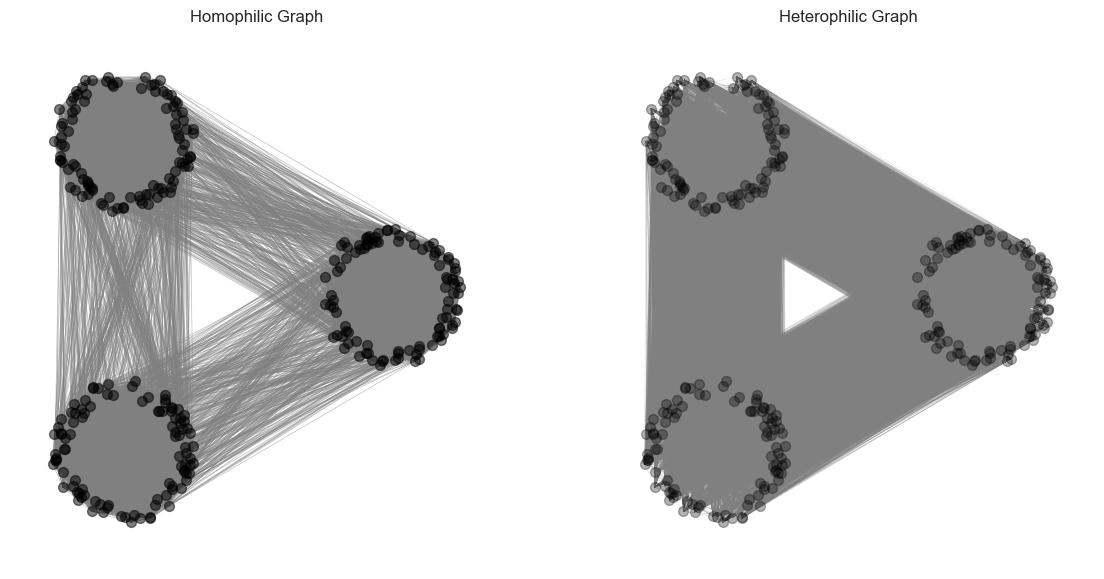

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

n = 300
k = 3   
nodes_per_community = n // k

positions = {
    i: (np.cos(2 * np.pi * i / k), np.sin(2 * np.pi * i / k))
    for i in range(k)
}

node_community = {}
for i in range(k):
    for j in range(nodes_per_community):
        node_community[i * nodes_per_community + j] = i

pos = {}
for node, community in node_community.items():
    angle = 2 * np.pi * np.random.rand()  # random angle for within-community variation
    radius = 0.1 * np.random.rand() + 0.3 # random radius for spacing within community
    pos[node] = (positions[community][0] + radius * np.cos(angle),
                 positions[community][1] + radius * np.sin(angle))


G_homophilic = nx.Graph()
for node in range(n):
    G_homophilic.add_node(node)
    for neighbor in range(node + 1, n):
        if node_community[node] == node_community[neighbor]:
            # Higher probability of connecting within the same community
            if np.random.rand() < 0.9:
                G_homophilic.add_edge(node, neighbor)
        else:
            # Lower probability of connecting between communities
            if np.random.rand() < 0.05:
                G_homophilic.add_edge(node, neighbor)


G_heterophilic = nx.Graph()
for node in range(n):
    G_heterophilic.add_node(node)
    for neighbor in range(node + 1, n):
        if node_community[node] != node_community[neighbor]:
            # Higher probability of connecting between communities
            if np.random.rand() < 0.9:
                G_heterophilic.add_edge(node, neighbor)
        else:
            # Lower probability of connecting within the same community
            if np.random.rand() < 0.1:
                G_heterophilic.add_edge(node, neighbor)


fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Homophilic graph
nx.draw(G_homophilic, pos, ax=axs[0], node_size=50, node_color="black", edge_color='gray', width=.5, alpha=.5)
axs[0].set_title('Homophilic Graph')


# Heterophilic graph
nx.draw(G_heterophilic, pos, ax=axs[1], node_size=50, node_color="black", edge_color='gray', width=.3, alpha=.3)
axs[1].set_title('Heterophilic Graph')

plt.show()

In [3]:
from ParametricGraphModels.ADC_SBM import ADC_SBM, from_config
from config import Scenarios 
from graspy.simulations import sbm
import networkx as nx

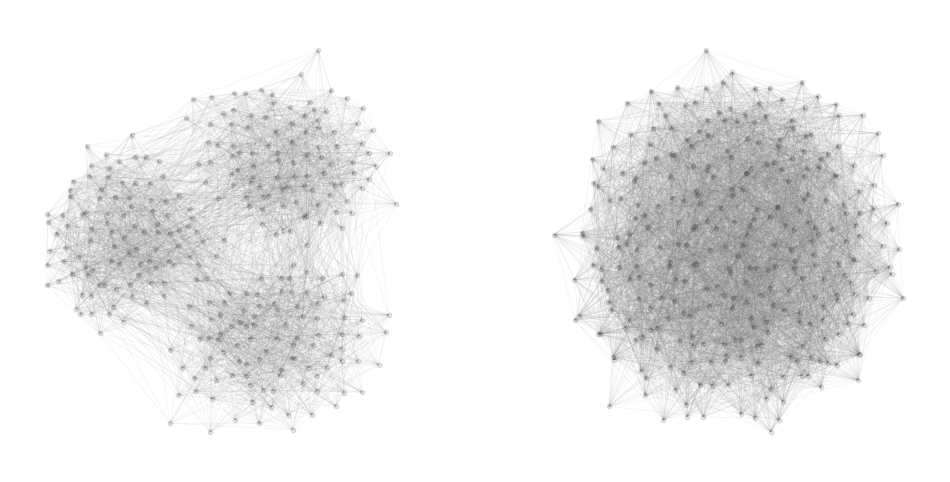

In [18]:
n = 3

d = 0.2
t1 = 0.03
t2 = 0.1

B1 = np.array(([[d,  t1, t1],
                [t1, d, t1],
                [t1, t1, d ]]))

B2 = np.array(([[d,  t2, t2],
                [t2, d, t2],
                [t2, t2, d]]))

sbm_graph1 = sbm([100, 100, 100], B1, loops=False)
sbm_graph2 = sbm([100, 100, 100], B2, loops=False)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


nx.draw(nx.from_numpy_array(sbm_graph1), 
        ax=axes[0], node_size=10, alpha=0.1, node_color="black", edge_color='gray', width=.5)
#axes[0].set_title(r'$\frac{𝜋_{w}}{𝜋_{b}} = \frac{0.2}{0.03}$')


nx.draw(nx.from_numpy_array(sbm_graph2), 
        ax=axes[1], node_size=10, alpha=0.1, node_color="black", edge_color='gray', width=.5)
#axes[1].set_title(r'$\frac{𝜋_{w}}{𝜋_{b}} =\frac{0.2}{0.1}$')

plt.show()

### Feature cluster 

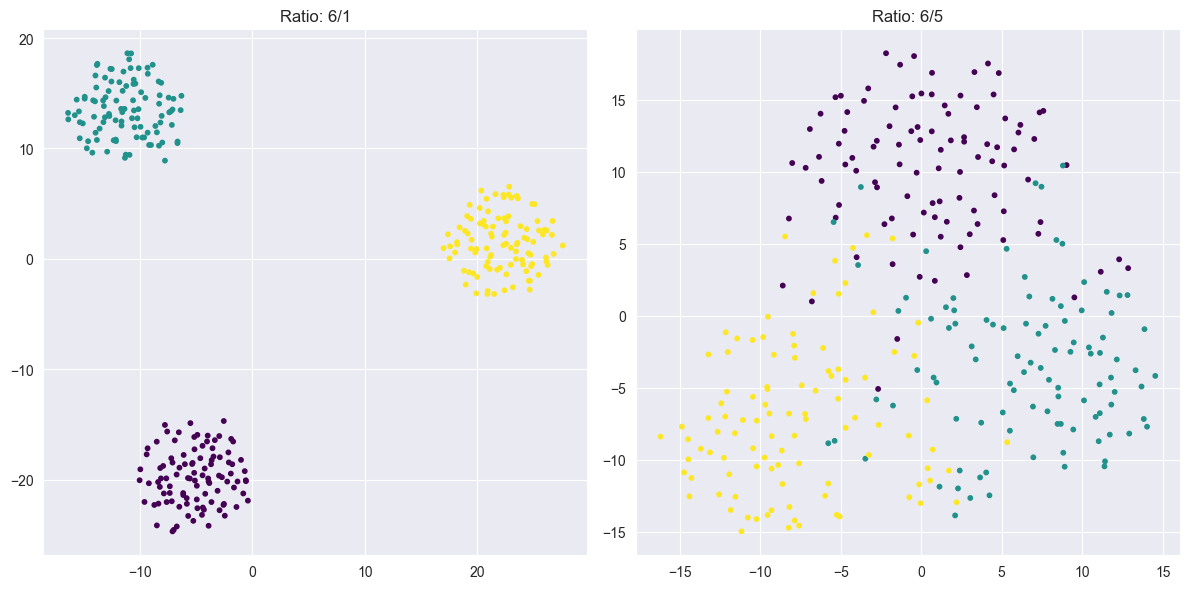

In [22]:
illustrative_1 = {
        # Well seperated by features-cluster with relevant parameters.
        # However, no edge clustering and no relevance of community belonging.

        "name": "cluster_relevant",
        "task": "multiclass",

        "community_sizes": [100, 100, 100],
        "cluster_sizes": [100, 100, 100],  # same as com_size -> overlap
        "m_features": 6,
        # "k_clusters": 4, determined by "cluster_size"
        "alpha": 2, "beta": 20, "lmbd": .5,

        "between_com_prob_range": (.6, .6),
        "within_com_prob_range": (.05, .05),

        "centroid_variance_range": (6, 6),  # spectral detectability of feature cluster
        "within_clust_variance_range": (2, 2),

        "within_clust_covariance_range": (0, .0),  # not important; fixed
        "centroid_covariance_range": (0, 0),  # not important; fixed

        "n_targets": 5,
        "degree_importance": 1,

        "x_importance": 4,
        "feature_info": "cluster",  # "number" or "cluster" use x right away or dummies for cluster

        "community_importance": 1,  # this scale shouldn't be interpreted analog to x and degree
        "community_importance_exponent": 1,
        "model_error": 2,
        "splitweights": [.7, .2, .1]

    }  
illustrative_2 = {
        # Well seperated by features-cluster with relevant parameters.
        # However, no edge clustering and no relevance of community belonging.

        "name": "cluster_relevant",
        "task": "multiclass",

        "community_sizes": [100, 100, 100],
        "cluster_sizes": [100, 100, 100],  # same as com_size -> overlap
        "m_features": 6,
        # "k_clusters": 4, determined by "cluster_size"
        "alpha": 2, "beta": 20, "lmbd": .5,

        "between_com_prob_range": (.6, .6),
        "within_com_prob_range": (.05, .05),

        "centroid_variance_range": (6, 6),  # spectral detectability of feature cluster
        "within_clust_variance_range": (8, 8),

        "within_clust_covariance_range": (0, .0),  # not important; fixed
        "centroid_covariance_range": (0, 0),  # not important; fixed

        "n_targets": 5,
        "degree_importance": 1,

        "x_importance": 4,
        "feature_info": "cluster",  # "number" or "cluster" use x right away or dummies for cluster

        "community_importance": 1,  # this scale shouldn't be interpreted analog to x and degree
        "community_importance_exponent": 1,
        "model_error": 2,
        "splitweights": [.7, .2, .1]

    }  

g2 = from_config(illustrative_1, 6)
l2, x2, y2 = *g2.reduce_dim_x(), g2.y

g3 = from_config(illustrative_2, 6)
l3, x3 = g3.reduce_dim_x()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

scatter1 = axes[0].scatter(x2[:, 0], x2[:, 1], c=l2, cmap='viridis', s=10, edgecolor=None)
axes[0].set_title('Ratio: 6/1')

scatter2 = axes[1].scatter(x3[:, 0], x3[:, 1], c=l3, cmap='viridis', s=10, edgecolor=None)
axes[1].set_title('Ratio: 6/5')

plt.tight_layout()
plt.show()

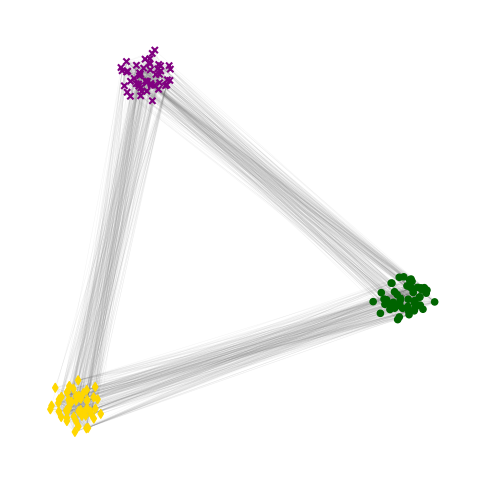

     0    1    2
0  622  256  254
1  256  626  273
2  254  273  632
     Y~F  Y~C  F~C
NMI  1.0  1.0  1.0
CV   1.0  1.0  1.0
ARI  1.0  1.0  1.0
Community
0    0.0
1    0.0
2    0.0
dtype: float64
Feat.Cluster
0    0.0
1    0.0
2    0.0
dtype: float64


In [11]:
params = Scenarios.illustrative_1
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

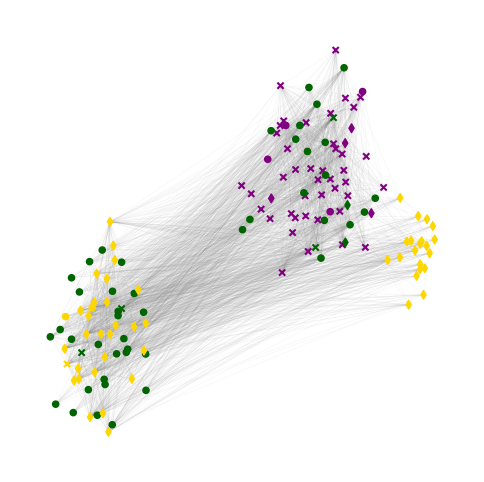

     0    1    2
0  537  395  369
1  395  457  338
2  369  338  567
          Y~F       Y~C       F~C
NMI  0.338691  0.617236  0.518951
CV   0.557779  0.831085  0.643650
ARI  0.265814  0.687397  0.400675
Community
0    0.2816
1    0.2176
2    0.1144
dtype: float64
Feat.Cluster
0    0.515918
1    0.545000
2    0.000000
dtype: float64


In [12]:
params = Scenarios.illustrative_2
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

In [ ]:
params = Scenarios.illustrative_4
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

In [ ]:
params = Scenarios.illustrative_6
graph = from_config(params)
graph.rich_plot_graph(fig_size=(6,6))
print(graph.target_edge_counter())
print(graph.label_correlation())
print(graph.purity(fig_size=(6,6), group_by="Community", metric= "gini", plot_it=False))
print(graph.purity(fig_size=(6,6), group_by="Feat.Cluster", metric= "gini", plot_it=False))

In [1]:
from torch_geometric.datasets import Planetoid, Reddit
from torch_geometric.transforms import NormalizeFeatures

# Load datasets
cora_dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=NormalizeFeatures())
citeseer_dataset = Planetoid(root='/tmp/CiteSeer', name='CiteSeer', transform=NormalizeFeatures())
pubmed_dataset = Planetoid(root='/tmp/PubMed', name='PubMed', transform=NormalizeFeatures())
reddit_dataset = Reddit(root='/tmp/Reddit', transform=NormalizeFeatures())

In [2]:
import numpy as np

def get_split_sizes(data):
    train_size = data[0].train_mask.sum().item()
    val_size = data[0].val_mask.sum().item()
    test_size = data[0].test_mask.sum().item()
    total_size = data[0].x.shape[0]
    x = np.array([train_size, test_size, val_size, total_size])
    return np.round(x[0:3]/x[3],3) * 100

cora_splits = get_split_sizes(cora_dataset)
citeseer_splits = get_split_sizes(citeseer_dataset)
pubmed_splits = get_split_sizes(pubmed_dataset)
reddit_splits = get_split_sizes(reddit_dataset)

print("Cora Splits:", cora_splits)
print("CiteSeer Splits:", citeseer_splits)
print("PubMed Splits:", pubmed_splits)
print("Reddit Splits:", reddit_splits)


Cora Splits: [ 5.2 36.9 18.5]
CiteSeer Splits: [ 3.6 30.1 15. ]
PubMed Splits: [0.3 5.1 2.5]
Reddit Splits: [65.9 23.9 10.2]


In [16]:
x = np.arange(1378)
w = np.array([.05, .15, .3])
mv = np.round(w * len(x))

mask = np.random.permutation(
                np.concatenate(
                    (np.repeat("None", len(x)-sum(mv)),
                    np.repeat('train', mv[0]),
                    np.repeat('test', mv[1]),
                    np.repeat('val', mv[2]))
                )
            )

len(mask)

1378